In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
# load the data
titanic_data=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [53]:
titanic_data.head() # printsthe first 5 rows of the data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
titanic_data.shape # number of rows and columns of the data

(891, 12)

In [55]:
titanic_data.info() # getting some information regarding the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
# getting the number of missing values in the table
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
# handling the missing values
# as most of the cabin information is missing we cannot use this column effectively, hence it is better to drop it altogether
titanic_data=titanic_data.drop(columns='Cabin', axis=1) #1 represents column (0 for row)

In [58]:
# now for the missing values in the age column, since the majority of data is available, we can't just remove the column
# instead we will replace the 177 missing values with the median of the available data
median_age = titanic_data['Age'].median()
titanic_data['Age'] = titanic_data['Age'].fillna(median_age) # can use inplace so that all values are changed in the existing table itself

In [59]:
# for the embarked column, we will replace the missing data with the value that is repeated the most, ie the mode
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [60]:
titanic_data=titanic_data.fillna(titanic_data['Embarked'].mode()[0])

In [61]:
# now we see that there are no missing values and our dataset is complete
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [62]:
# now we analayse the data
# fetching some statistical info of our data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
# finding how many people survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [64]:
# visualizing the data
sns.set()

Text(0, 0.5, 'Count')

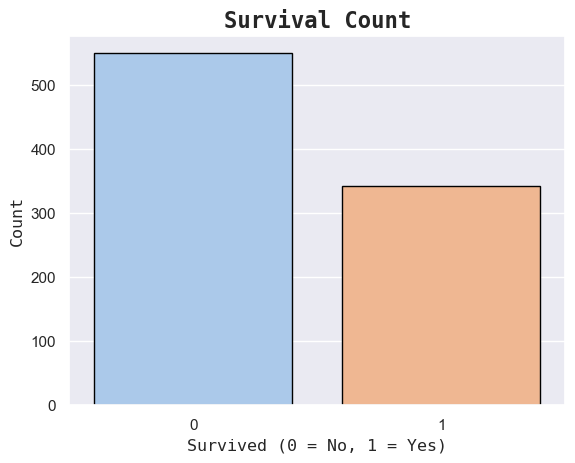

In [65]:
ax=sns.countplot(
    x='Survived', 
    data=titanic_data, 
    hue='Survived',  # Assign same variable as `x` to `hue`
    palette='pastel', 
    edgecolor='black',
    legend=False  # Disable legend (since it's redundant)
)
ax.set_title('Survival Count', fontfamily='monospace', fontsize=16, fontweight='bold') 
ax.set_xlabel('Survived (0 = No, 1 = Yes)', fontfamily='monospace', fontsize=12)       
ax.set_ylabel('Count', fontfamily='monospace', fontsize=12)       

In [66]:
titanic_data['Sex'].value_counts() #getting the number of male and female passengers

Sex
male      577
female    314
Name: count, dtype: int64

Text(0, 0.5, 'Count')

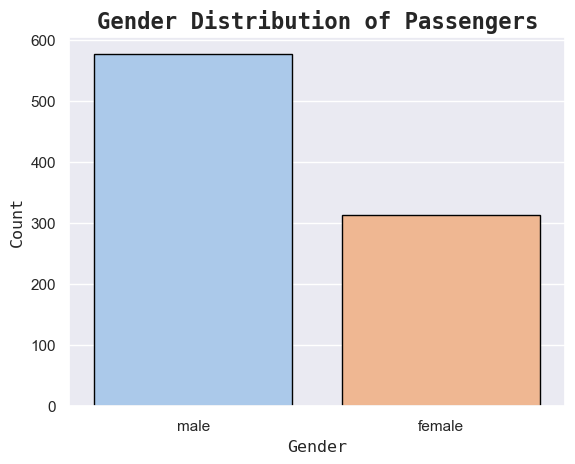

In [67]:
ax=sns.countplot(
    x='Sex', 
    data=titanic_data, 
    hue='Sex', 
    palette='pastel', 
    edgecolor='black',
    legend=False
)
ax.set_title('Gender Distribution of Passengers', fontfamily='monospace', fontsize=16, fontweight='bold') 
ax.set_xlabel('Gender', fontfamily='monospace', fontsize=12)       
ax.set_ylabel('Count', fontfamily='monospace', fontsize=12)   

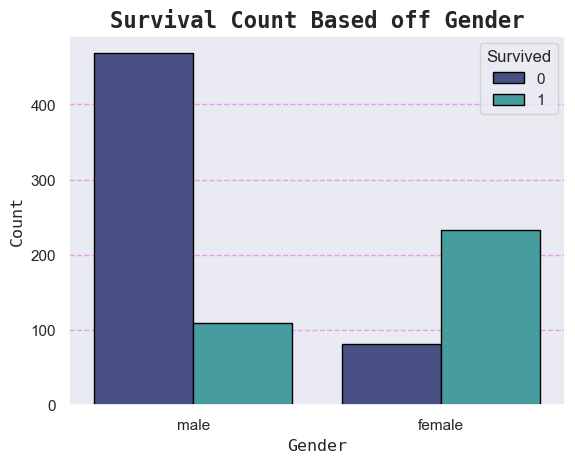

In [68]:
# figuring out the survival rates based off gender
ax=sns.countplot(
    x='Sex', 
    data=titanic_data, 
    hue='Survived', 
    palette='mako', 
    edgecolor='black',
    legend=True
)
ax.set_title('Survival Count Based off Gender', fontfamily='monospace', fontsize=16, fontweight='bold') 
ax.set_xlabel('Gender', fontfamily='monospace', fontsize=12)       
ax.set_ylabel('Count', fontfamily='monospace', fontsize=12) 
plt.grid(
    axis='y',         # Show grid for y-axis only ('x', 'y', or 'both')
    linestyle='--',   # Line style: '--', '-.', ':', etc.
    alpha=0.75,        # Transparency (0=invisible, 1=solid)
    color='violet'      # Grid line color
)

Text(0, 0.5, 'Count')

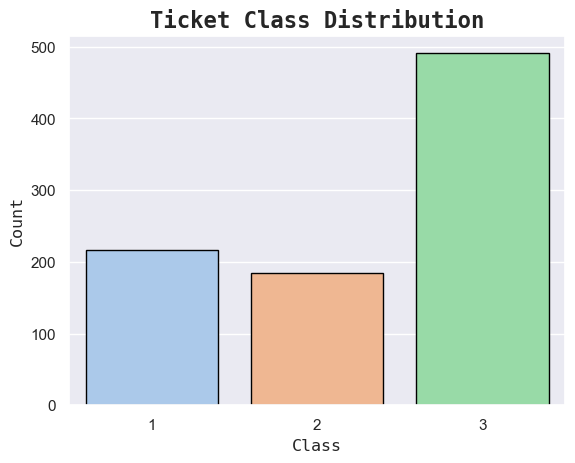

In [69]:
ax=sns.countplot(
    x='Pclass', 
    data=titanic_data, 
    hue='Pclass', 
    palette='pastel', 
    edgecolor='black',
    legend=False
)
ax.set_title('Ticket Class Distribution', fontfamily='monospace', fontsize=16, fontweight='bold') 
ax.set_xlabel('Class', fontfamily='monospace', fontsize=12)       
ax.set_ylabel('Count', fontfamily='monospace', fontsize=12)   

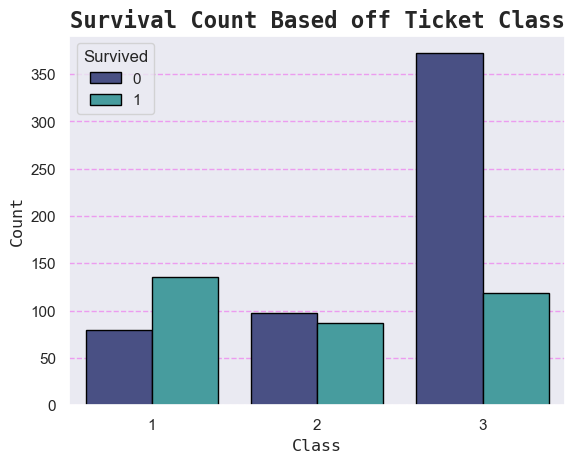

In [70]:
# figuring out the survival rates based off ticket class
ax=sns.countplot(
    x='Pclass', 
    data=titanic_data, 
    hue='Survived', 
    palette='mako', 
    edgecolor='black',
    legend=True
)
ax.set_title('Survival Count Based off Ticket Class', fontfamily='monospace', fontsize=16, fontweight='bold') 
ax.set_xlabel('Class', fontfamily='monospace', fontsize=12)       
ax.set_ylabel('Count', fontfamily='monospace', fontsize=12) 
plt.grid(
    axis='y',        
    linestyle='--',  
    alpha=0.75,       
    color='violet'      
)

In [71]:
# Encoding the categorial columns
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

C:\Users\Devansh Shah\AppData\Local\Temp\ipykernel_17212\2361275392.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


In [72]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [108]:
median_age = titanic_test['Age'].median()
titanic_test['Age'] = titanic_test['Age'].fillna(median_age)

avg_fare = titanic_test['Fare'].mean()
titanic_test['Fare'] = titanic_test['Fare'].fillna(avg_fare)
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [109]:
# Separating features and target
X_train = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
Y_train = titanic_data['Survived']

In [77]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  28.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]


In [78]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [81]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
titanic_test.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

C:\Users\Devansh Shah\AppData\Local\Temp\ipykernel_17212\2483757450.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_test.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


In [83]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [110]:
X_test = titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# Y_test = titanic_test['Survived'] >> we dont need this, cause we have to predict it 

In [111]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (891, 7) (418, 7)


In [112]:
# Model Training using Logistic Regression
model= LogisticRegression()

In [113]:
model.fit(X_train, Y_train)

C:\Users\Devansh Shah\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
# model evaluation
X_train_prediction=model.predict(X_train) 

In [115]:
print(X_train_prediction)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 

In [116]:
training_data_accuracy=accuracy_score(Y_train, X_train_prediction) #finding the accuracy score by comparing the predicted value with Y_train

In [117]:
print(training_data_accuracy)

0.8013468013468014


In [118]:
# about 80 percent accuracy
# now lets find accuracy on test data
X_test_prediction=model.predict(X_test)

In [119]:
print(X_test_prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [124]:
predictions = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': titanic_test['PassengerId'],
    'Survived': predictions
})

# Save to CSV (no index!)
submission.to_csv('titanic_submissionfinal.csv', index=False)